In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('forbes_new.csv')
data.head()

,Rank,Name,Country,Sales,Profit,Assets,MV,Industry,Founded,Employees,Company age,World
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,Diversified Financials,1939,372000.0,84,North America
1,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0,Oil & Gas Operations,1933,68493.0,90,Asia
2,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,Banking,2000,270000.0,23,North America
3,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0,E-Commerce,1994,1608000.0,29,North America
4,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0,Electronics,1976,164000.0,47,North America


In [ ]:
# топ-5 индустрий по суммарному MV
industries = (data.groupby('Industry')['MV'].sum()).sort_values(ascending=False)[:5].index
# топ-5 стран по MV за 2022 год
countries = (data.groupby('Country')['MV'].sum()).sort_values(ascending=False)[:5].index

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

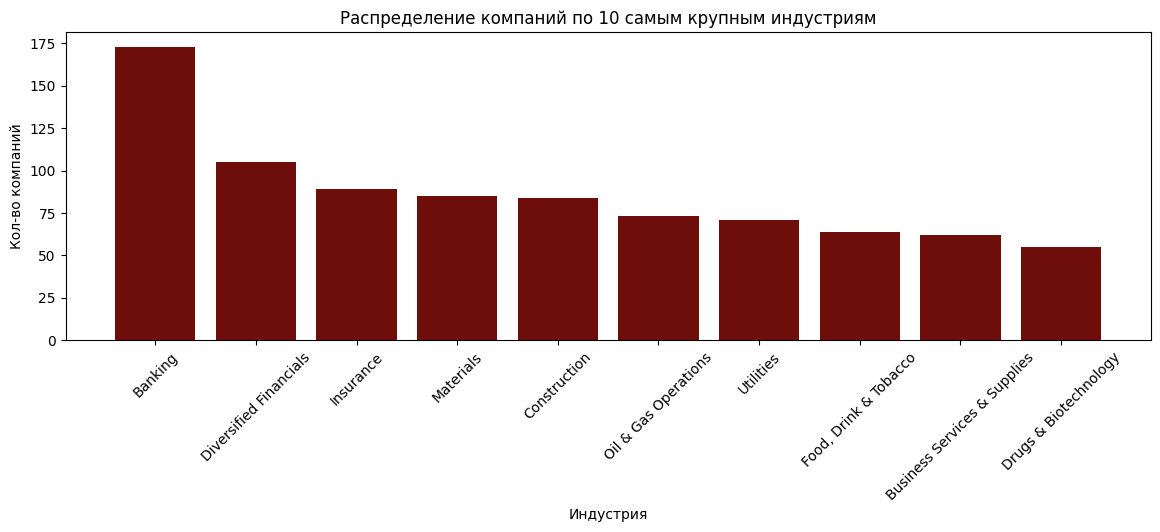

In [ ]:
a = data.groupby('Industry').count().sort_values(by='Rank',ascending=False).head(10)
plt.figure(figsize=(14, 4))
plt.bar(a.index, a['Rank'], color='#6E0E0A')
plt.xticks(rotation=45)
plt.xlabel('Индустрия')
plt.ylabel('Кол-во компаний')
plt.title('Распределение компаний по 10 самым крупным индустриям');

**Вывод:** больше всего компаний в списке из банкинга, финансов, страхования, ресурсов и строительства.

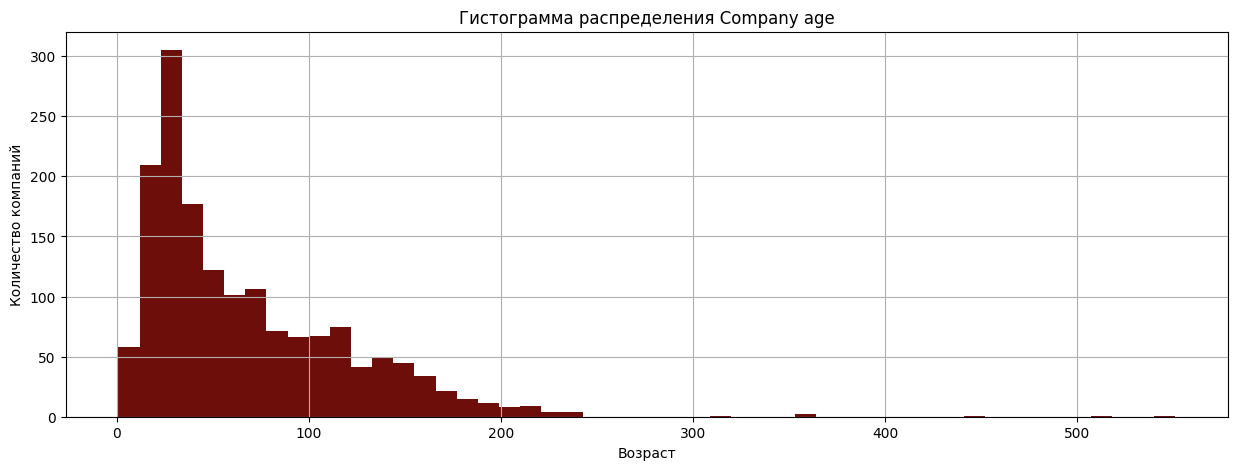

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.title("Гистограмма распределения Company age")
data["Company age"].hist(bins=50, color='#6E0E0A')
plt.xlabel('Возраст')
plt.ylabel('Количество компаний');

**Вывод:** в среднем компаниям в списке около 30-50 лет

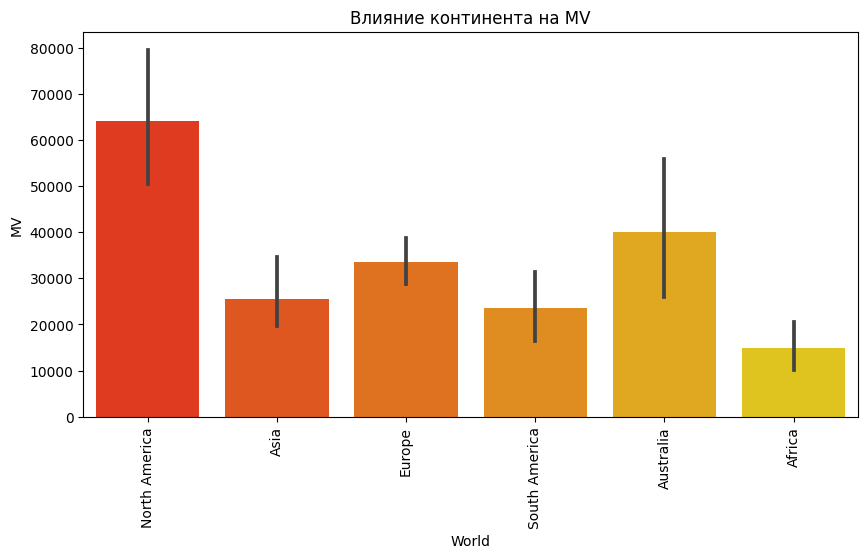

In [ ]:
sns.barplot(x="World", y="MV", data=data, palette="autumn")
plt.title("Влияние континента на MV")
plt.xticks(rotation=90)
plt.show()

**Вывод:** Если компания из Северной Америки, то у нее больше вероятность иметь высокий MV

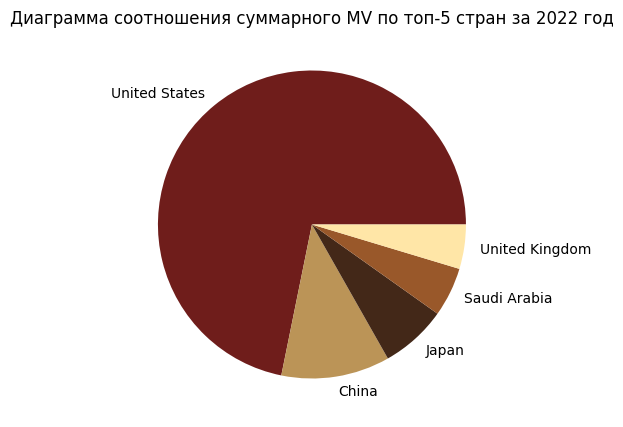

In [ ]:
y = (data.groupby('Country')['MV'].sum()).sort_values(ascending=False)[:5]
mylabels = (data.groupby('Country')['MV'].sum()).sort_values(ascending=False).index[:5]
mycolors = ['#6F1D1B', '#BB9457', '#432818', '#99582A', '#FFE6A7']

plt.pie(y, labels = mylabels, colors = mycolors)
plt.title("Диаграмма соотношения суммарного MV по топ-5 стран за 2022 год");
plt.show() 

**Вывод:** Среди топ-5 стран по списку Форбс 2022 США занимает наибольшую часть рынка

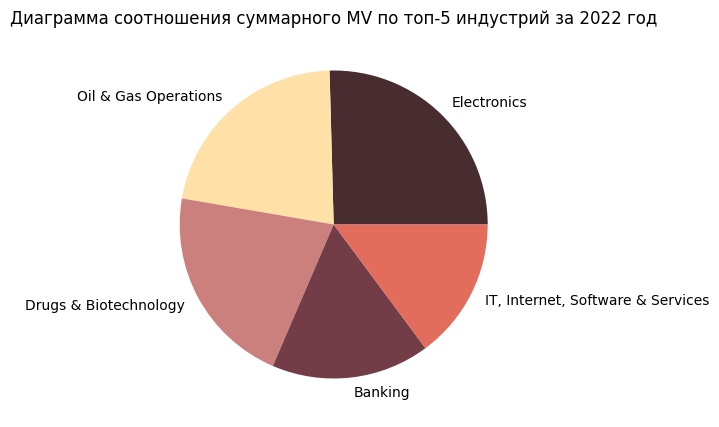

In [ ]:
y = (data.groupby('Industry')['MV'].sum()).sort_values(ascending=False)[:5]
mylabels = (data.groupby('Industry')['MV'].sum()).sort_values(ascending=False).index[:5]
mycolors = ['#472D30', '#FFE1A8', '#CB807D', '#723D46', '#E26D5C']

plt.pie(y, labels = mylabels, colors = mycolors)
plt.title("Диаграмма соотношения суммарного MV по топ-5 индустрий за 2022 год");
plt.show() 

**Вывод:** Топ-5 индустрий по списку Форбс 2022 занимают примерно одинаковую долю рынка.

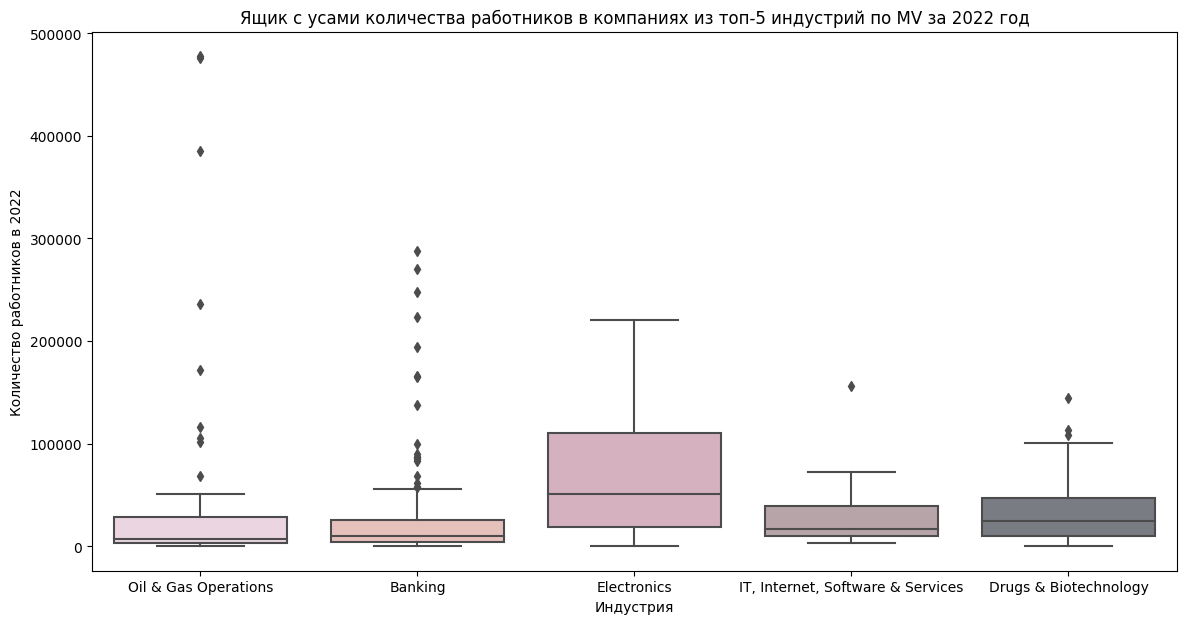

In [ ]:
plt.figure(figsize = (14,7))
sns.boxplot(x='Industry', 
               y='Employees', 
               data=data[['Industry', 'Employees']][ (data['Industry']).isin(industries)], 
               palette = ['#EDD2E0', '#EDBBB4', '#DBABBE', '#BAA1A7', '#797B84'])
plt.title("Ящик с усами количества работников в компаниях из топ-5 индустрий по MV за 2022 год");
plt.xlabel('Индустрия')
plt.ylabel('Количество работников в 2022');

**Вывод:** В среднем больше всего сотрудников в компаниях из сферы Electronics, также в этой сфере наибольший разброс. В сферах Oil&Gas Operations и Banking больше всего выбросов (нетипичных компаний) количества сотрудников по компаниям.

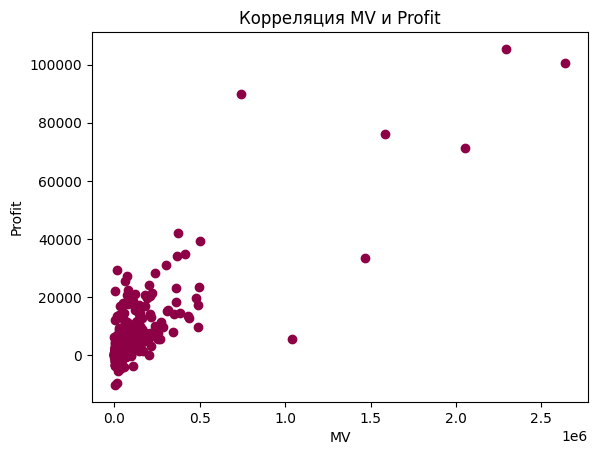

In [ ]:
plt.scatter(data.MV,data.Profit, color = '#8E0045')
plt.xlabel('MV')
plt.ylabel('Profit')
plt.title('Корреляция MV и Profit');

**Вывод:** между Market Value и Profit наблюдается высокая положительная корреляция.

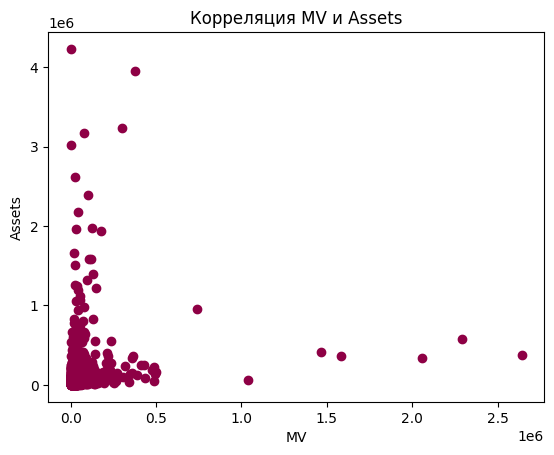

In [ ]:
plt.scatter(data.MV, data.Assets, color = '#8E0045')
plt.xlabel('MV')
plt.ylabel('Assets')
plt.title('Корреляция MV и Assets');

**Вывод:** между Market Value и Assets наблюдается положительная корреляция.